# Data Preparation for Machien Learning Mini-course tutorial
- Jason Brownlee
- https://machinelearningmastery.com/data-preparation-for-machine-learning-7-day-mini-course/

# Checking Common Packages

In [1]:
import scipy
print('scipy: %s' % scipy.__version__)
import numpy
print('numpy: %s' % numpy.__version__)
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
import sklearn
print('sklearn: %s' % sklearn.__version__)
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
import keras
print('keras: %s' % keras.__version__)

scipy: 1.4.1
numpy: 1.17.0
matplotlib: 3.2.2
pandas: 1.1.0
statsmodels: 0.11.1
sklearn: 0.23.1


# General
On a predictive modeling project, such as classification or regression, raw data typically cannot be used directly.

There are four main reasons why this is the case:
- Data Types: Machine learning algorithms require data to be numbers.
- Data Requirements: Some machine learning algorithms impose requirements on the data.
- Data Errors: Statistical noise and errors in the data may need to be corrected.
- Data Complexity: Complex nonlinear relationships may be teased out of the data.

The raw data must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as \textit{data preparation}.

There are common or standard tasks that you may use or explore during the data preparation step:
- Data Cleaning: Identifying and correcting mistakes or errors in the data.
- Feature Selection: Identifying those input variables that are most relevant to the task.
- Data Transforms: Changing the scale or distribution of variables.
- Feature Engineering: Deriving new variables from available data.
- Dimensionality Reduction: Creating compact projections of the data.
```
**info from Day 1 email series on data prep from Jason Brownlee
```

# Missing Values, Imputation

- statistical imputation
- horse colic data

In [11]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

In [52]:
## load data

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
df = read_csv(url,
              header=None,
              na_values='?')
data = df.values

## inspect data
print(data[0:2]); print('---'*30)
print(data[-2:]); print('---'*30)
print(data.shape)

[[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
  3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
  4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
  4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 2.00000e+00
  1.13000e+04 0.00000e+00 0.00000e+00 2.00000e+00]
 [1.00000e+00 1.00000e+00 5.34817e+05 3.92000e+01 8.80000e+01 2.00000e+01
          nan         nan 4.00000e+00 1.00000e+00 3.00000e+00 4.00000e+00
  2.00000e+00         nan         nan         nan 4.00000e+00 2.00000e+00
  5.00000e+01 8.50000e+01 2.00000e+00 2.00000e+00 3.00000e+00 2.00000e+00
  2.20800e+03 0.00000e+00 0.00000e+00 2.00000e+00]]
------------------------------------------------------------------------------------------
[[1.00000e+00 1.00000e+00 5.30612e+05 3.65000e+01 1.00000e+02 2.40000e+01
  3.00000e+00 3.00000e+00 3.00000e+00 1.00000e+00 3.00000e+00 3.00000e+00
  3.00000e+00 3.00000e+00 1.00000e+00         nan 4.00000e+00 4.00

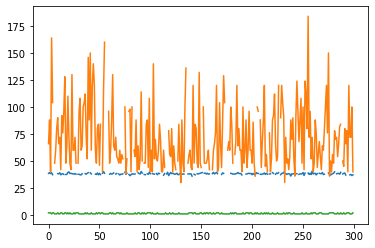

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df.values[:,3])
plt.plot(df.values[:,4])
plt.plot(df.values[:,23])
plt.show()

In [55]:
## split into input and output elements
## ix is all columns (data.shape[1] gives column number) that aren't 23abs
ix = [i for i in range(data.shape[1]) if i != 23]
#print(ix[0:100])

X, y = data[:, ix], data[:, 23]

In [56]:
## print missing

print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [57]:
## define the imputer and fit on data set
## all nan's are replaced with the mean
## https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer(strategy='mean')
imputer.fit(X)

## tranform the dataset
Xtrans = imputer.transform(X)

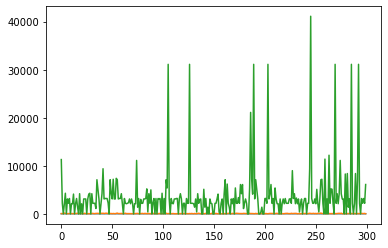

In [59]:
plt.plot(Xtrans[:,3])
plt.plot(Xtrans[:,4])
plt.plot(Xtrans[:,23])
plt.show()

In [62]:
print(X[0:2])
print('-'*30)
print(Xtrans[0:2])
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

[[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
  3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
  4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
  4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 1.13000e+04
  0.00000e+00 0.00000e+00 2.00000e+00]
 [1.00000e+00 1.00000e+00 5.34817e+05 3.92000e+01 8.80000e+01 2.00000e+01
          nan         nan 4.00000e+00 1.00000e+00 3.00000e+00 4.00000e+00
  2.00000e+00         nan         nan         nan 4.00000e+00 2.00000e+00
  5.00000e+01 8.50000e+01 2.00000e+00 2.00000e+00 3.00000e+00 2.20800e+03
  0.00000e+00 0.00000e+00 2.00000e+00]]
------------------------------
[[2.00000000e+00 1.00000000e+00 5.30101000e+05 3.85000000e+01
  6.60000000e+01 2.80000000e+01 3.00000000e+00 3.00000000e+00
  2.85375494e+00 2.00000000e+00 5.00000000e+00 4.00000000e+00
  4.00000000e+00 1.75510204e+00 1.58247423e+00 4.70754717e+00
  3.00000000e+00 5.00000000e+00 4.50000000e+01 8.4

# Feature Selection
- Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm. 
    - easy to confgure and use
    - effective at selecting features that are more or most relevant in predicting target variable.

In [69]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

## define/create dataset: synethetic classification dataset with 5 redundant features
## documentation, google 'sklearn.datasets.make_classification'
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=1,
                           random_state=1)

#print(X.shape); print(X[0:10])

In [71]:
## define RFE
## first a class is defined with chosen algorithm via estimator argument 
## chose number of features to select via n_features_to_select

## in the output, number one will be assigned to top features
##    according to n_features_to_select value specified

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

## fit the RFE 
rfe.fit(X, y)

## summarize all features 
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % 
          (i, rfe.support_[i], rfe.ranking_[i]))
    


Column: 0, Selected=False, Rank: 3
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 4
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1


# Scale Data With Normalization

- many algorithms perform better when numerical input variables are scaled to a standard range
    - examples: 
        - normalization: scales input variables separately to range 0-1
        - weighted sum of input, ie: linear regression
        - distance measures, ie: k-nn
 
 - This example uses normalization:
     - requires you know or can estimate min and max for each variable
     - uses MinMaxScaler

In [73]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

## define/create dataset: synethetic classification dataset with 5 redundant features
## documentation, google 'sklearn.datasets.make_classification'
X, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=5,
                           n_redundant=0,
                           random_state=1)

## Look at data
print(X[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]


In [102]:
## define scaler
trans = MinMaxScaler()
## transform data
X_norm = trans.fit_transform(X)
## look at data
print(X_norm[:3, :])

[[0.77608466 0.0239289  0.48251588 0.18352101 0.59830036]
 [0.40400165 0.79590304 0.27369632 0.6331332  0.42104156]
 [0.77065362 0.50132629 0.48207176 0.5076991  0.4293882 ]]


In [109]:
## manual check to get min and max before transformationabs
Minlist, Maxlist  = [], []
for i in range(X.shape[1]):
    Xmin = min(X[0:X.shape[0], i])
    Minlist.append(Xmin)
    Xmax = max(X[0:X.shape[0], i])
    Maxlist.append(Xmax)

## manual check to get min and max after transformation (T)
MinlistT, MaxlistT = [], []
for i in range(X_norm.shape[1]):
    XminT = min(X_norm[0:X_norm.shape[0], i])
    MinlistT.append(XminT)
    XmaxT = max(X_norm[0:X_norm.shape[0], i])
    MaxlistT.append(XmaxT)

print(Minlist); print(Maxlist)
print('-'*60)
print(MinlistT); print(MaxlistT)


[-3.554258293086638, -6.0167462574529615, -4.92105446411105, -3.896056936767188, -4.973566453734836]
[4.109213823629416, 3.988971417183685, 4.053637201377505, 5.994383947517616, 5.089333677902673]
------------------------------------------------------------
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.9999999999999999, 1.0, 1.0, 1.0, 1.0]


# One-Hot Encoding Transformation

- Machine learning models require all input and output variables to be numeric
- With one-hot encoding, categorical variables are transformed to numbers
    - each label for a category is mapped to a unique integer
    - one new binary variable is added to data set for each unique integer value in the variable
    - ordinal categories are then removed

In [128]:
from pandas import read_csv
from sklearn.preprocessing import OneHotEncoder

## define dataset url
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'

## load data 
file = read_csv(url, header=None)
data = file.values

## review data
print(data[0:2, :])

[["'40-49'" "'premeno'" "'15-19'" "'0-2'" "'yes'" "'3'" "'right'"
  "'left_up'" "'no'" "'recurrence-events'"]
 ["'50-59'" "'ge40'" "'15-19'" "'0-2'" "'no'" "'1'" "'right'" "'central'"
  "'no'" "'no-recurrence-events'"]]


In [130]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

print(X[:3, :])

[["'40-49'" "'premeno'" "'15-19'" "'0-2'" "'yes'" "'3'" "'right'"
  "'left_up'" "'no'"]
 ["'50-59'" "'ge40'" "'15-19'" "'0-2'" "'no'" "'1'" "'right'" "'central'"
  "'no'"]
 ["'50-59'" "'ge40'" "'35-39'" "'0-2'" "'no'" "'2'" "'left'" "'left_low'"
  "'no'"]]


In [127]:
## define one-hot encoder
encoder = OneHotEncoder(sparse=False)

## fit transform and apply it to the input data
X_ohe = encoder.fit_transform(X)

## review transformed data
print(X_ohe[:3, :])

[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]


# Transform Numbers to Categories
- Discretization transform using kBins (scikit-learn KBinsDiscretizer)
- Some machine learning algorithms may prefer or require categorical or ordinal input variables,
    - ex: some decision tree and rule-based algorithms
    
- Many machine learning algorithms prefer or perform better when numerical input variables with non-standard distributions are transformed to have a new distribution or an entirely new data type
    - One approach is to use the transform of the numerical variable to have a discrete probability 
    distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.


In [132]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer

In [133]:
## define dataset
X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=5, n_redundant=0,
                           random_state=1)

print(X[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]


In [134]:
## define transformer
trans = KBinsDiscretizer(n_bins=10, 
                         encode='ordinal', 
                         strategy='uniform')

## transform data
X_disc = trans.fit_transform(X)
print(X_disc[:3, :])

[[7. 0. 4. 1. 5.]
 [4. 7. 2. 6. 4.]
 [7. 5. 4. 5. 4.]]


# Dimensionality Reduction with PCA
- PCA: creates lower dimension projection of a dataset
- this example: 
    - creates synthetic binary classification dataset with 10 input variables then 
    - uses PCA to reduce the dimensionality of the dataset to the three most important components.

In [135]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=7,
                           random_state=1)

print(X[:3, :])

[[-0.53448246  0.93837451  0.38969914  0.0926655   1.70876508  1.14351305
  -1.47034214  0.11857673 -2.72241741  0.2953565 ]
 [-2.42280473 -1.02658758 -2.34792156 -0.82422408  0.59933419 -2.44832253
   0.39750207  2.0265065   1.83374105  0.72430365]
 [-1.83391794 -1.1946668  -0.73806871  1.50947233  1.78047734  0.58779205
  -2.78506977 -0.04163788 -1.25227833  0.99373587]]


In [136]:
## define the transform
PCAtrans = PCA(n_components=3)

## transform the data
X_pca = PCAtrans.fit_transform(X)

print(X_pca[:3, :])

[[-1.64710578 -2.11683302  1.98256096]
 [ 0.92840209  4.8294997   0.22727043]
 [-3.83677757  0.32300714  0.11512801]]
